# Trabajo práctico N° 2: Binarias eclipsantes

### 1. Estime los parámetros fı́sicos fotométricos (i, rg y rs ) del sistema binario (tipo Algol) V501Mon. Para ello, siga los pasos indicados a continuación, utilice los datos y los resultados de la Práctica nro. 1 y considere la siguiente información: 

### Brillo máximo del sistema $m_0$ = 12,320 ± 0,014 mag
### Tipo de eclipses: totales
## a)
Descargue del Classroom el archivo V501Mon fot.dat, que contiene la tabla con los datos de la curva de luz.1 Las fases φ de los datos están calculadas adoptando φ = 0 en el punto medio del mı́nimo principal (Tmin I = 2453401,65013 ± 0,00044). Las magnitudes fueron medidas en el filtro V . Consideramos que tienen un error tı́pico ∼ 0,005 mag. Transforme los brillos a intensidades, tomando como unidad el brillo máximo. Represente gráficamente la intensidad en función de la fase. Identifique el eclipse primario y el secundario.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Para que todas las figuras tengan el mismo tamaño de fuentes es más facil definirlas de manera global
# Además formateo los ticks y el tamaño por defecto de la figura
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 8

plt.rc('font', family='calibri', size=16)#, serif='STIXGeneral') # fuente por defecto
plt.rc('axes', titlesize=22)     # tamaño de fuente título de axe
plt.rc('axes', labelsize=18)     # tamaño de fuente nombre de ejes
plt.rc('xtick', labelsize=16, direction='in')    # tamaño de fuentes ticks
plt.rc('ytick', labelsize=16, direction='in')    # tamaño de fuentes ticks
plt.rc('legend', fontsize=16)    # tamaño de fuentes referencia
plt.rc('figure', titlesize=24)   # tamaño de fuente título de figura
plt.rc('mathtext', fontset='stix')
plt.rc('xtick.minor', visible=True)
plt.rc('ytick.minor', visible=True)
plt.rc('xtick.minor', top=False)
plt.rc('xtick.major', size=10)
plt.rc('xtick.minor', size=6)
plt.rc('ytick.major', size=10)
plt.rc('ytick.minor', size=6)

In [3]:
fase, V = np.loadtxt('V501Mon_fot.dat', unpack=True)

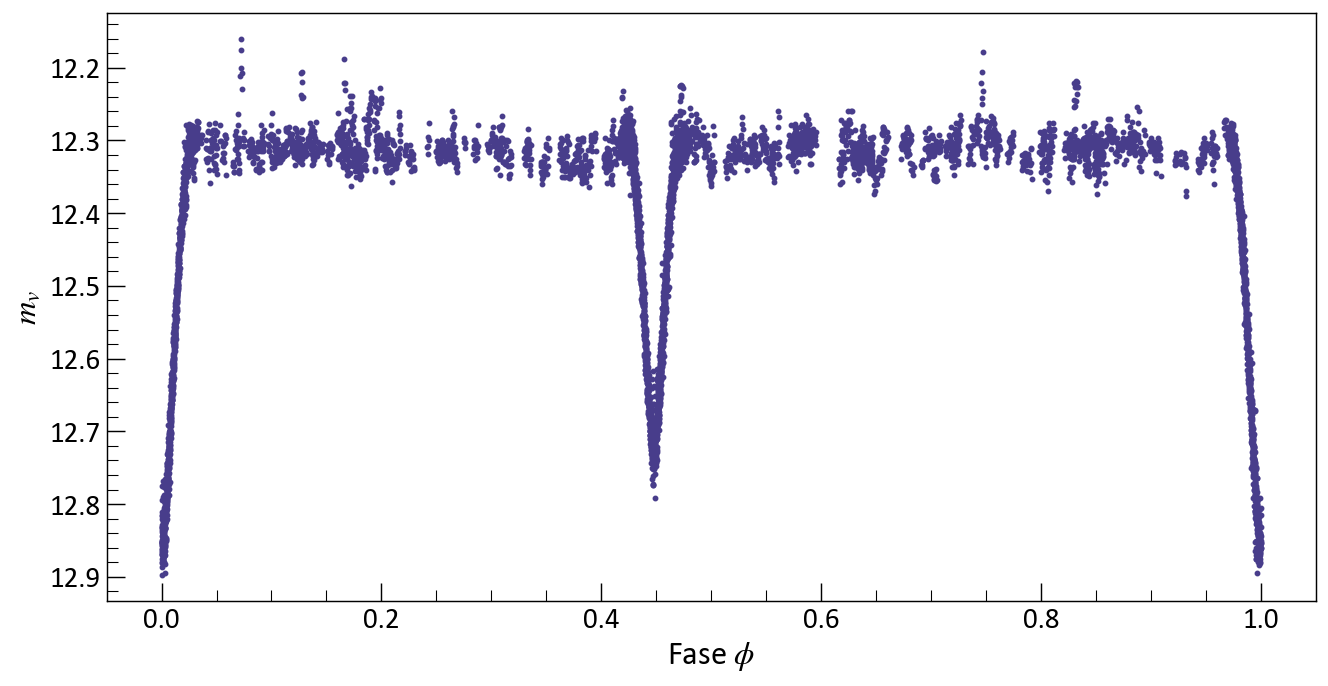

In [4]:
%matplotlib inline

fig, ax =plt.subplots(figsize = (12,6), dpi = 130)

plt.scatter(fase, V, marker='o', s=5, c='darkslateblue')
ax.invert_yaxis()

ax.set_xlabel ('Fase $\phi$')
ax.set_ylabel ('$m_v$')

plt.show()  

In [5]:
def intensidad(m):
    m_0 = 12.320 #±0.014
    i = 10**(-(m-m_0)/2.5)
    return i
I = intensidad(V)

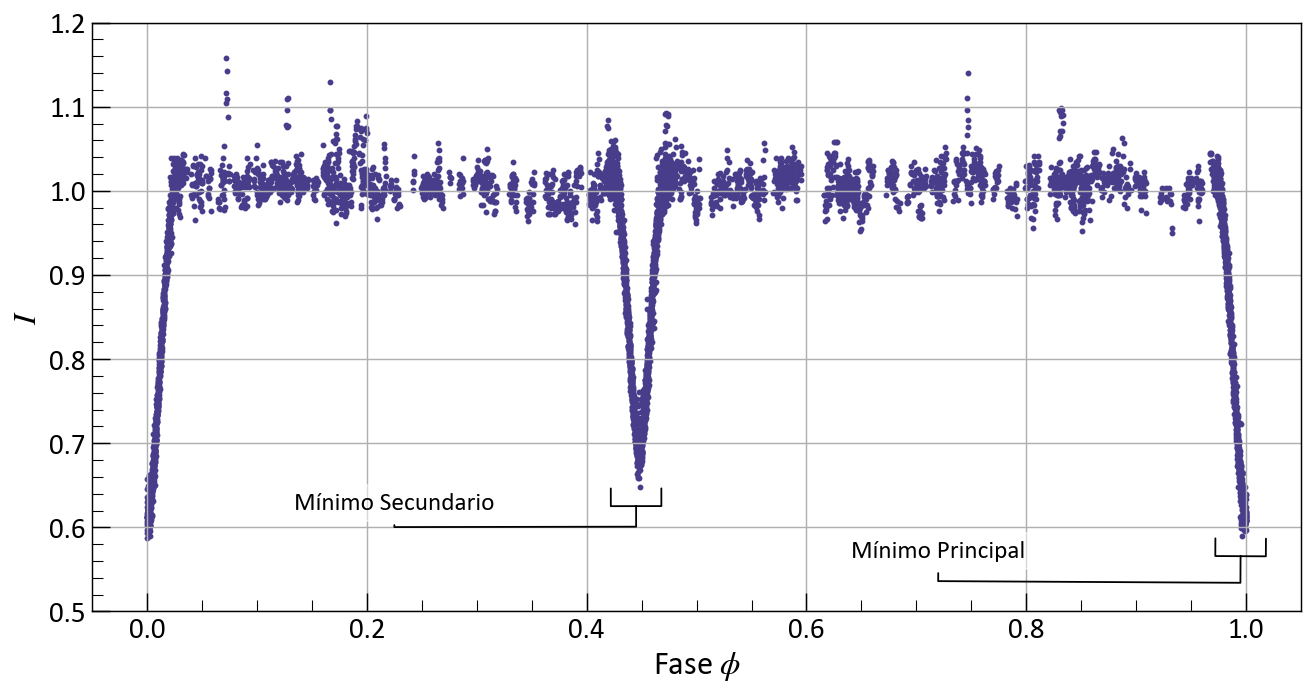

In [ ]:
%matplotlib inline

fig, ax =plt.subplots(figsize = (12,6), dpi = 130)

plt.scatter(fase, I, marker='o', s=5, c='darkslateblue')

#####Texto##########################################################################

ax.annotate('Mínimo Principal', xy=(0.95,0.1), xytext=(0.7, 0.085), xycoords='axes fraction', 
            fontsize=14, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white', alpha=0.5, edgecolor='white'),
            arrowprops=dict(arrowstyle='-[, widthB=1.0, lengthB=0.7', lw=1.0, connectionstyle='bar, fraction=0.1'))

ax.annotate('Mínimo Secundario', xy=(0.45,0.185), xytext=(0.25, 0.1665), xycoords='axes fraction', 
            fontsize=14, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white', alpha=0.5, edgecolor='white'),
            arrowprops=dict(arrowstyle='-[, widthB=1.0, lengthB=0.7', lw=1.0, connectionstyle='bar, fraction=0.1'))

####################################################################################
ax.grid()
ax.set_ylim(0.5,1.2)
ax.set_xlabel ('Fase $\phi$')
ax.set_ylabel ('$I$')

plt.show() 

## b)
Obtenga el cociente de los radios de las componentes del sistema, $k=rs/rg$, utilizando las intensidades en los mínimos de los eclipses y las fases de los contactos (vea el documentoTP_bineclip_teoria.pdf que se encuentra en el Classroom).

In [7]:
# Utilizando los mínimos de los eclipses
# Del gráfico anterior podemos observar que:

I1 = 0.58775  # x=0.00033
I2 = 0.648032 # x=0.448540

k = np.sqrt((1-I1)/I2)
print('k = ', k)

k =  0.7975944185182925


In [ ]:
# Utilizando las fases de los contactos en el eclipse principal

T0   = 0.1712 # Tiempo de pasaje por el periastro (expresado como fase)

t1 = 0.9750 # Comienzo del eclipse
t2 = 0.9971 # Comienzo del máximo
t3 = 1.0023 # Final del máximo
t4 = 1.0244 # Final del eclipse

k1 = (t1 - t2 + t3 - t4)/(t1 + t2 - t3 - t4)
print('k = ', k1)

k =  0.8095238095238101


## c)
Estime los valores de la inclinación $i$ de la órbita y el radio $r_g$ de la estrella primaria.
  Para eso, elija primero un conjunto de datos fotométricos entre el tercer y el cuarto contacto del eclipse
  principal (Utilice la zona de la curva de la luz que más se asemeja a una recta) $(\phi_3 < \phi < \phi_4)$. Después, calcule el área ocultada $\alpha$ para cada uno de esos puntos.
  Luego, usando el programa drg.f calcule el cociente $\delta/r_g$ para cada valor de $\alpha$.
  Por otra parte, calcule la fase orbital en radianes $\theta = 2 \pi \phi$ para los mismos puntos.
  Por último, realice un ajuste lineal a los puntos del gráfico $(\delta/r_g)^2$ en función de $(\sin \theta)^2$.

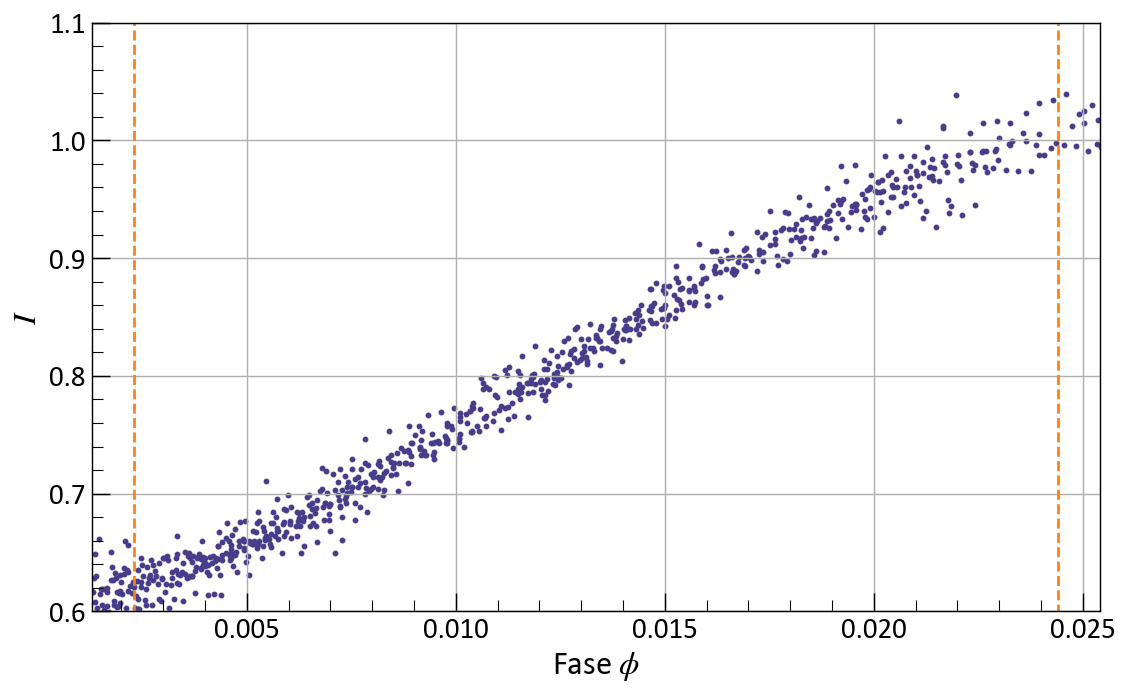

In [18]:
%matplotlib inline

fig, ax =plt.subplots(figsize = (10,6), dpi = 130)

plt.scatter(fase, I, marker='o', s=5, c='darkslateblue')

####################################################################################
plt.vlines(t3-1, 0.5, 1.2,color='C1', linestyles='--', label='$t_3$') # Tercer contacto
plt.vlines(t4-1, 0.5, 1.2,color='C1', linestyles='--', label='$t_4$') # Cuarto contacto
####################################################################################
ax.grid()
ax.set_ylim(0.6,1.1)
ax.set_xlim(t3-1.001,t4-0.999)
ax.set_xlabel ('Fase $\phi$')
ax.set_ylabel ('$I$')

plt.show() 

In [ ]:
# Me quedo con los valores entre los contactos, haciendo un "casteo booleano"
fase_recta = fase[(fase > t1) & (fase < t2)]
I_recta = I[(fase > t1) & (fase < t2)]
# Y con esto puedo calcular el área ocultada (alpha) de la componente principal por la secundaria,
# teniendo en cuenta la intensidad en el eclipse primario (I1)
alpha = (1-I_recta)/(1-I1)

np.savetxt('entrada.dat', np.transpose(alpha)) # Lo guardo encolumnado (transpose) para correrlo en fortran.

kprom = (0.7975944185182925+0.8095238095238101)/2

alpha, deltaRg = np.loadtxt('salida.dat', unpack=True) # deltaRg es la distancia proyectada entre el centro de las
                                                       # componentes respecto del radio de la componente principal

tita_recta = 2*np.pi*fase_recta # Fase en radianes

# Ajusto a los datos:
from scipy.optimize import curve_fit

def recta(x, A0, A1):
    'Función de ajuste'
    y = A0 + A1*x
    return y

x = np.sin(tita_recta)**2
y = deltaRg**2

coefs, cov = curve_fit(recta, x, y)
#coefs_err = np.sqrt(np.diag(cov))  # Las raices cuadradas de la diagonal son los errores del ajuste
print('Coeficientes:')
print(coefs)

print('kprom = ', kprom)

fit_x = np.linspace(min(x),max(x),250)
fit_y = recta(fit_x, coefs[0], coefs[1])

Coeficientes:
[4.87192651e-02 1.30781129e+02]
kprom =  0.8035591140210513


<function matplotlib.pyplot.show(close=None, block=None)>

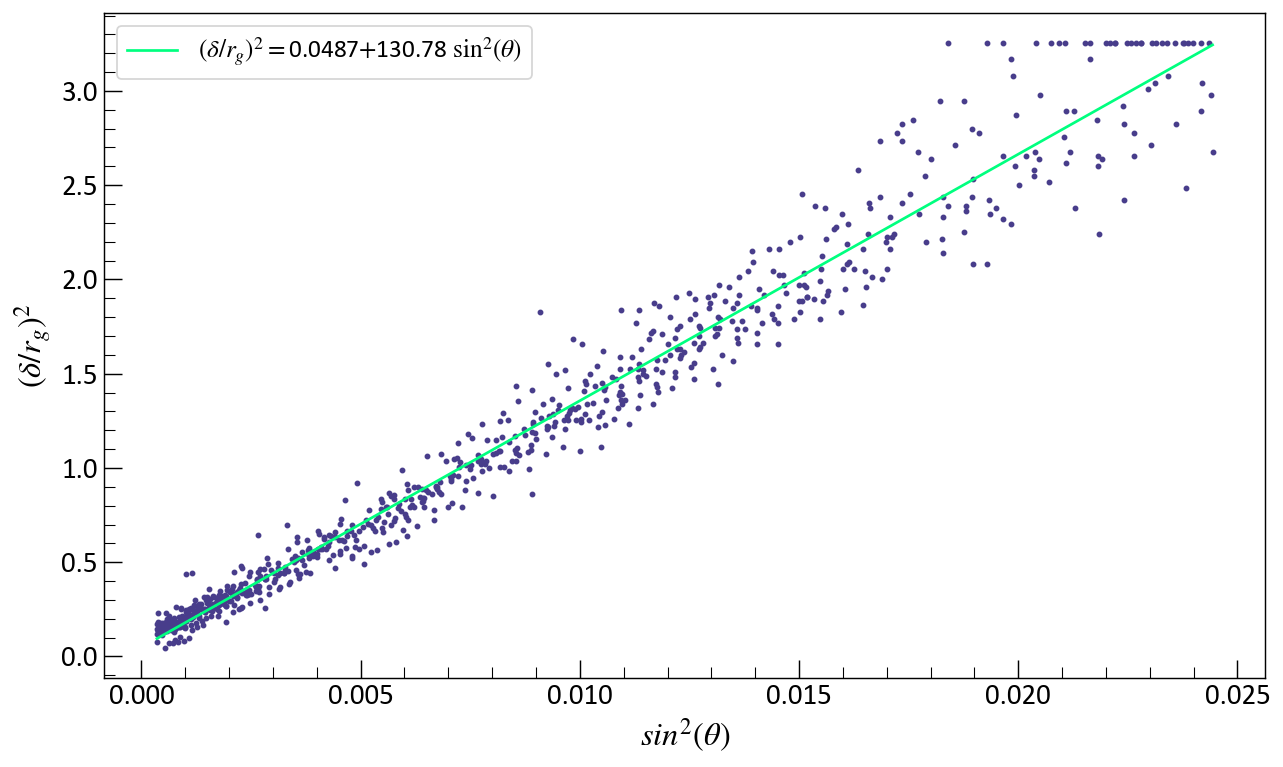

In [ ]:
%matplotlib inline

fig, ax =plt.subplots(figsize = (10,6), dpi = 130)

plt.scatter(x, y, marker='o', s=5, c='darkslateblue')
ax.plot(fit_x,fit_y, color = 'springgreen', label='$(\delta/r_g)^2=$'+str(round(coefs[0],4))+'$+$'+str(round(coefs[1],2))+ r'$~\sin^2(\theta)$')

ax.set_xlabel (r'$sin^2(\theta)$')
ax.set_ylabel (r'$(\delta/r_g)^2$')

plt.legend(fontsize=14)
fig.tight_layout()
plt.show

In [12]:
# Obtengo los valores de la inclinación i de la órbita y el radio de la componente principal rg
# a partir de los coeficientes del ajuste anterior:

rg  = np.sqrt(1/(coefs[0]+coefs[1])) # respecto del semieje mayor de la órbita relativa
rs  = kprom*rg                       # respecto del semieje mayor de la órbita relativa
inc = np.arctan(np.sqrt(coefs[1]/coefs[0]))

print('rg = a*', rg)
print('rs = a*', rs)
print('i = ', inc)

rg = a* 0.08742720233790637
rs = a* 0.07025292525198722
i =  1.551497811270729


### 2) Con la información obtenida en el ejercicio 1 y los resultados de la Práctica nro. 1:
## a)
obtenga las masas absolutas de cada componente y las dimensiones lineales del sistema y de cada componente
 (expresándolas en unidades adecuadas).

In [13]:
e = 0.13207821465170208      # ·Datos extraídos de la práctica anterior
a1sini = 7377615.786496753   # ·[km]
a2sini = 8308625.23090675    # ·[km]
M1sin3i = 1.650261576536084  # ·Msol
M2sin3i = 1.4653442080420966 # ·Msol

a1 = a1sini/(np.sin(inc))
a2 = a2sini/(np.sin(inc))
M1 = M1sin3i/(np.power(np.sin(inc),3))
M2 = M2sin3i/(np.power(np.sin(inc),3))
a = a1 + a2 # El semieje mayor de la órbita relativa es la suma de los s.ejes de cada órbita respecto del CM
b = a*np.sqrt(1-np.power(e,2)) # Semieje menor
c = np.sqrt(np.power(a,2)-np.power(b,2)) # Distancia del centro al foco

print('rg = ', a*rg, 'km') # radio de la comp. principal
print('rs = ', a*rs, 'km') # radio de la comp. secundaria
print('M1 = ', M1, 'Msol')
print('M2 = ', M2, 'Msol')
print('a1 = ', a1, 'km')
print('a2 = ', a2, 'km')
print('a = a1+a2 = ', a, 'km')
print('e =', e)
print('b = ', b, 'km')
print('c = ', c, 'km')

rg =  1371659.584864723 km
rs =  1102209.5607523797 km
M1 =  1.6511838084266406 Msol
M2 =  1.4661631007428135 Msol
a1 =  7378989.832409568 km
a2 =  8310172.672908343 km
a = a1+a2 =  15689162.505317912 km
e = 0.13207821465170208
b =  15551714.422557315 km
c =  2072196.5730828287 km


## b)
dibuje un diagrama del sistema a escala en el momento del paso por el periastro, visto desde la dirección polar, mostrando la órbita relativa de la componente

In [14]:
from matplotlib.patches import Circle, Ellipse

In [15]:
# Paso todos los datos a UA's

aUA = a/(1.5*10**8)
bUA = b/(1.5*10**8)
cUA = c/(1.5*10**8)
rgUA = a*rg/(1.5*10**8)
rsUA = a*rs/(1.5*10**8)

print('aUA = ', aUA, '[UA]')
print('bUA = ', bUA, '[UA]')
print('cUA = ', cUA, '[UA]')
print('rgUA = ', rgUA, '[UA]')
print('rsUA = ', rsUA, '[UA]')

aUA =  0.10459441670211941 [UA]
bUA =  0.10367809615038209 [UA]
cUA =  0.013814643820552192 [UA]
rgUA =  0.009144397232431488 [UA]
rsUA =  0.007348063738349198 [UA]


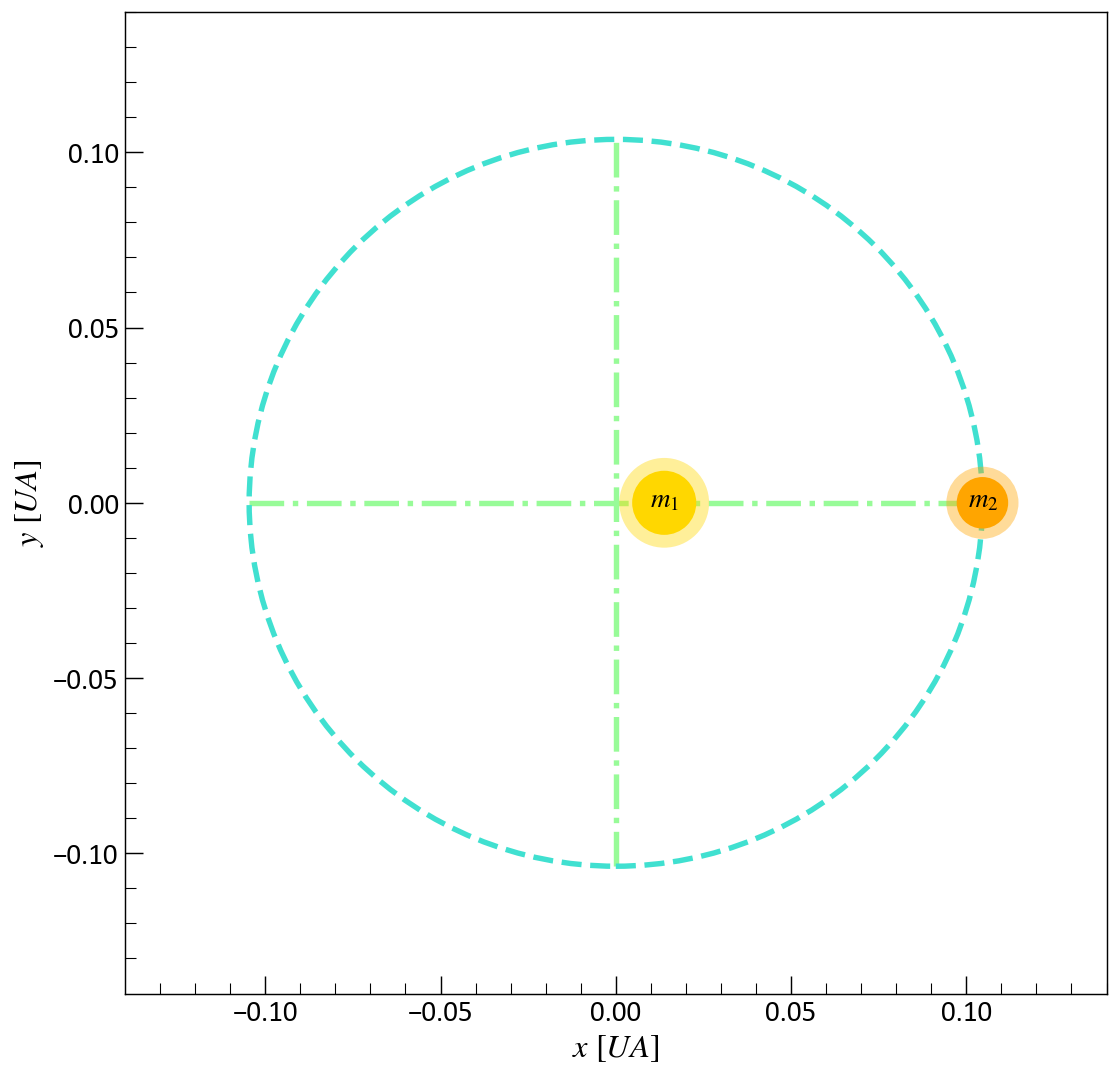

In [ ]:
%matplotlib inline

fig, ax = plt.subplots(figsize = (10,10), dpi = 130)

#### Defino objetos #####################################################################################################
orbita = Ellipse(xy=(0, 0), width=2*aUA, height=2*bUA, edgecolor='turquoise', fc='None', lw=3, linestyle='--', zorder=3)
estrella1 = Circle(xy=(cUA,0), radius=rgUA, fc='gold', alpha=1, zorder=5)
estrella2 = Circle(xy=(aUA,0), radius=rsUA, fc='orange', alpha=1, zorder=4)
corona1 = Circle(xy=(cUA,0), radius=1.4*rgUA, fc='gold', alpha=0.4, zorder=5)
corona2 = Circle(xy=(aUA,0), radius=1.4*rsUA, fc='orange', alpha=0.4, zorder=4)

plt.axis('square') # gráfico cuadrado

#### Ejes de la elipse ###################################################################################################
plt.hlines(0.0, xmin=-aUA, xmax=aUA, color='palegreen', lw=3, linestyles='-.', zorder=2)
plt.vlines(0.0, ymin=-bUA, ymax=bUA, color='palegreen', lw=3, linestyles='-.', zorder=1)

#### Agrego los objetos al gráfico #######################################################################################
ax.add_artist(orbita)
ax.add_artist(estrella1)
ax.add_artist(estrella2)
ax.add_artist(corona1)
ax.add_artist(corona2)

#### Texto ###############################################################################################################
ax.annotate(str('$m_1$'), color = "black", xy = (0.7*cUA,-0.001), size = 15, zorder=6)
ax.annotate(str('$m_2$'), color = "black", xy = (0.96*aUA,-0.001), size = 15, zorder=6)

ax.set_xlabel('$x~[UA]$')
ax.set_ylabel('$y~[UA]$')
ax.set_xlim(-0.14,0.14)
ax.set_ylim(-0.14,0.14)

plt.show()